## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
x_train.shape

(404, 13)

In [4]:
# First observation in dataset
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
# Normalizing data (see the range of units in cell above)
x_train_trans = keras.utils.normalize(x_train, axis=-1, order=2)
x_test_trans = keras.utils.normalize(x_test, axis=-1, order=2)

In [6]:
# First normalized observation
x_test_trans[0]

array([0.02675675, 0.        , 0.02677953, 0.        , 0.0010046 ,
       0.00951931, 0.14795322, 0.0027145 , 0.03550877, 0.98536841,
       0.02988655, 0.04031725, 0.04298041])

In [7]:
# Instantiating a Keras model
np.random.seed(42)

model = Sequential()

# Adding layers to model
# 'input_dim': only needed in first layer!
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#(loss='mean_squared_error', optimizer='sgd')

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dropout_2 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_______________________

In [8]:
# Running model on 2500 Epochs 
history = model.fit(x_train_trans, y_train, epochs=2000, validation_split=.2)

Instructions for updating:
Use tf.cast instead.
Train on 323 samples, validate on 81 samples
Epoch 1/2000
323/323 [==============================] - 1s 2ms/step - loss: 573.9581 - mean_squared_error: 573.9581 - val_loss: 643.6535 - val_mean_squared_error: 643.6535
Epoch 2/2000
323/323 [==============================] - 0s 86us/step - loss: 570.0402 - mean_squared_error: 570.0402 - val_loss: 639.5529 - val_mean_squared_error: 639.5529
Epoch 3/2000
323/323 [==============================] - 0s 86us/step - loss: 566.2715 - mean_squared_error: 566.2715 - val_loss: 635.1000 - val_mean_squared_error: 635.1000
Epoch 4/2000
323/323 [==============================] - 0s 85us/step - loss: 562.2585 - mean_squared_error: 562.2585 - val_loss: 630.6296 - val_mean_squared_error: 630.6296
Epoch 5/2000
323/323 [==============================] - 0s 91us/step - loss: 557.7921 - mean_squared_error: 557.7921 - val_loss: 625.9490 - val_mean_squared_error: 625.9490
Epoch 6/2000
323/323 [=====================

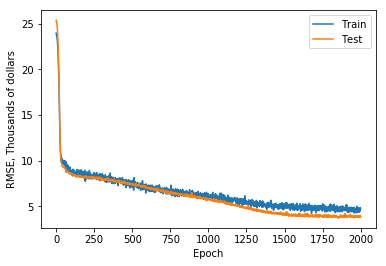

In [9]:
# Plotting Root Mean Square Error change over Epochs
import matplotlib.pyplot as plt
%matplotlib inline

RMSE_train = np.sqrt(history.history['mean_squared_error'])
RMSE_test = np.sqrt(history.history['val_mean_squared_error'])
fig, ax = plt.subplots()
ax.plot(RMSE_train, label = 'Train')
ax.plot(RMSE_test, label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE, Thousands of dollars')
plt.legend()
plt.show()

In [10]:
y_pred = model.predict(x_test_trans)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE from NN: {RMSE:.3f}')

RMSE from NN: 5.643


### Comparing to Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

In [ ]:

y_pred = linreg.predict(x_test_trans)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE from Linear Regression: {RMSE:.3f}')

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [3]:
##### Your Code Here #####
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape each image into a single line of floats between 0 and 1
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4423680/4422102 [==============================] - 1s 0us/step


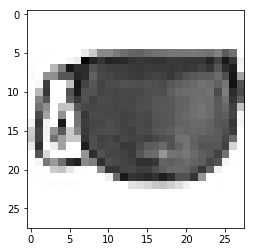

In [11]:
plt.imshow(x_train[178].reshape(28,28), cmap='Greys');

In [12]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [15]:
np.random.seed(42)

# Two inner layers of 28 each, 
def NN2():
    model = Sequential()
    model.add(Dense(28, activation='relu', input_dim=784))
    model.add(Dropout(0.1))
    model.add(Dense(28, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(28, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
model = NN2()
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50, batch_size=200, verbose=1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 41us/step - loss: 1.0669 - acc: 0.6224 - val_loss: 0.5721 - val_acc: 0.8016
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.6036 - acc: 0.7889 - val_loss: 0.4756 - val_acc: 0.8322
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.5264 - acc: 0.8156 - val_loss: 0.4554 - val_acc: 0.8344
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.4916 - acc: 0.8276 - val_loss: 0.4323 - val_acc: 0.8445
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.4637 - acc: 0.8363 - val_loss: 0.4152 - val_acc: 0.8491
Epoch 6/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.4512 - acc: 0.8418 - val_loss: 0.4126 - val_acc: 0.8501
Epoch 7/50
60

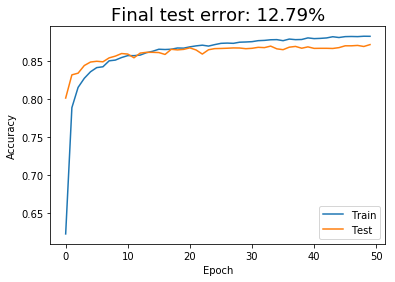

In [17]:
scores = model.evaluate(x_test, y_test, verbose=0)
fig, ax = plt.subplots()
ax.plot(history.history['acc'], label = 'Train')
ax.plot(history.history['val_acc'], label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.title(f'Final test error: {100-scores[1]*100:.2f}%', fontsize=18)
plt.legend()
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.